# BERT

### Resources   
- https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/
- https://searchenterpriseai.techtarget.com/definition/BERT-language-model
- https://www.thepythoncode.com/article/finetuning-bert-using-huggingface-transformers-python
- https://towardsdatascience.com/text-classification-with-bert-in-pytorch-887965e5820f
- https://towardsdatascience.com/bert-text-classification-using-pytorch-723dfb8b6b5b
- https://curiousily.com/posts/multi-label-text-classification-with-bert-and-pytorch-lightning/
- https://towardsdatascience.com/bert-for-dummies-step-by-step-tutorial-fb90890ffe03
- https://neptune.ai/blog/how-to-code-bert-using-pytorch-tutorial
- https://medium.com/analytics-vidhya/text-summarization-using-bert-gpt2-xlnet-5ee80608e961

In [3]:
import pandas as pd
import requests
import numpy as np

In [5]:
req = requests.get('http://ufcstats.com/event-details/335ad945324c3a2e')

In [12]:
df = pd.read_html('http://ufcstats.com/event-details/335ad945324c3a2e')[0]

In [13]:
df

,W/L,Fighter,Kd,Str,Td,Sub,Weight class,Method,Round,Time
0,win,Francis Ngannou Ciryl Gane,0 0,43 63,4 1,0 3,Heavyweight,U-DEC,5,5:00
1,win,Deiveson Figueiredo Brandon Moreno,3 0,86 105,2 1,0 0,Flyweight,U-DEC,5,5:00
2,win,Michel Pereira Andre Fialho,0 0,107 45,1 0,0 0,Welterweight,U-DEC,3,5:00
3,win,Said Nurmagomedov Cody Stamann,0 0,7 1,0 0,1 0,Bantamweight,SUB Guillotine Choke,1,0:47
4,win,Michael Morales Trevin Giles,1 0,26 8,0 1,0 1,Welterweight,KO/TKO Punches,1,4:06
5,win,Victor Henry Raoni Barcelos,0 0,181 134,0 1,0 0,Bantamweight,U-DEC,3,5:00
6,win,Jack Della Maddalena Pete Rodriguez,1 0,43 25,0 0,0 0,Welterweight,KO/TKO Punch,1,2:59
7,win,Tony Gravely Saimon Oliveira,0 0,46 35,11 0,0 4,Bantamweight,U-DEC,3,5:00
8,win,Matt Frevola Genaro Valdez,4 0,60 10,0 0,0 0,Lightweight,KO/TKO Punches,1,3:15
9,win,Vanessa Demopoulos Silvana Gomez Juarez,0 1,4 10,0 0,2 0,Women's Strawweight,SUB Armbar,1,2:25


In [5]:
import numpy as np
np.median([3,3,2,5])

3.0

In [2]:
levels_fyi_data = requests.get('https://www.levels.fyi/js/salaryData.json').json()
levels_df = pd.DataFrame(levels_fyi_data)
levels_df.shape

(62642, 17)

In [3]:
levels_df = levels_df.drop(['cityid', 'dmaid','rowNumber'], axis=1)
levels_df = levels_df.replace("", np.nan)

In [4]:
levels_df['timestamp'] = pd.to_datetime(levels_df['timestamp'])
levels_df[
    ['yearsofexperience','basesalary','bonus','stockgrantvalue','totalyearlycompensation','yearsatcompany']
] = levels_df[
    ['yearsofexperience','basesalary','bonus','stockgrantvalue','totalyearlycompensation','yearsatcompany']
].apply(pd.to_numeric)

In [11]:
levels_df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails
0,2017-06-07 11:33:27,Oracle,L3,Product Manager,186,"Redwood City, CA",1,1,NaN,160,17,9,NaN,NaN
1,2017-06-10 17:11:29,eBay,SE 2,Software Engineer,0,"San Francisco, CA",3,4,NaN,0,0,0,NaN,NaN
2,2017-06-11 14:53:57,Amazon,L7,Product Manager,126,"Seattle, WA",10,0,NaN,126,0,0,NaN,NaN
3,2017-06-14 21:22:25,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,NaN,92799,55371,23178,NaN,NaN
4,2017-06-16 10:44:01,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,NaN,156335,0,57840,NaN,NaN


In [12]:
fb = levels_df[levels_df['company'].isin(['Facebook', 'Meta'])]

In [31]:
fb[(fb['title'] == 'Data Scientist') & (fb['basesalary'] != 0)][
    ['yearsofexperience', 'basesalary']
].value_counts().reset_index().rename(columns = {0 : 'count'}).sort_values(by = 'basesalary')

,yearsofexperience,basesalary,count
90,3,63,1
124,1,72,1
46,0,78,1
0,3,78,2
147,0,80,1
...,...,...,...
48,10,280,1
83,9,288,1
63,14,294,1
21,7,303,1


<AxesSubplot:>

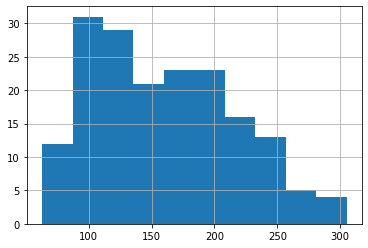

In [21]:
fb[(fb['title'] == 'Data Scientist') & (fb['basesalary'] != 0)].sort_values(by = 'basesalary')['basesalary'].hist()

<AxesSubplot:>

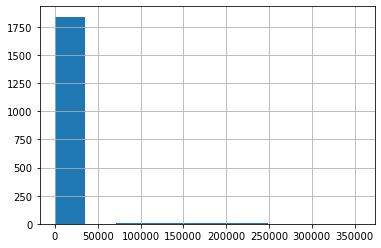

In [22]:
fb[(fb['title'] == 'Software Engineer') & (fb['basesalary'] != 0)].sort_values(by = 'basesalary')['basesalary'].hist()

In [23]:
fb[(fb['title'] == 'Software Engineer') & (fb['basesalary'] != 0)]

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails
23,2017-07-21 15:34:53,Facebook,E6,Software Engineer,485280,"San Francisco, CA",5,7,NaN,175950,267130,42200,NaN,NaN
71,2017-09-04 14:17:07,Facebook,E4,Software Engineer,282,"Menlo Park, CA",1,1,NaN,189,79,14,NaN,NaN
116,2017-10-17 22:57:39,Facebook,E6,Software Engineer,3386013,"Seattle, WA",11,5,NaN,208032,3140803,37178,NaN,schloub kliafy waitz mccreaucs snooks swuew ca...
117,2017-10-19 01:31:35,Facebook,E6,Software Engineer,1661,"Menlo Park, CA",12,1,NaN,305,1320,36,NaN,NaN
121,2017-10-21 13:13:16,Facebook,E3,Software Engineer,149665,"San Francisco, CA",0,0,NaN,78123,47530,24012,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62491,2021-08-15 22:17:26,Facebook,IC4,Software Engineer,262,"Menlo Park, CA",7,4,Web Development (Front-End),185,49,28,NaN,ceosts knaop
62492,2021-08-15 22:20:26,Facebook,E5,Software Engineer,502,"Seattle, WA",7,0,Full Stack,293,183,26,Male,thaab spaagy gnuirn yioupp juasly draasly
62523,2021-08-16 09:20:58,Facebook,E5,Software Engineer,464,"Seattle, WA",7,0,Distributed Systems (Back-End),284,146,34,Male,mcmeucs mcleatch riocy twauv schmiengly yienn
62586,2021-08-16 19:14:27,Facebook,E4,Software Engineer,326,"New York, NY",3,2,Distributed Systems (Back-End),221,92,13,Male,rhoish schroub physaently shieg plaesp wiom sh...


In [34]:
levels_df[levels_df['company'] == 'Databricks'].title.unique()

array(['Solution Architect', 'Software Engineer',
       'Software Engineering Manager', 'Technical Program Manager',
       'Marketing'], dtype=object)

In [9]:
list(map(int, str(123)))

[1, 2, 3]

In [101]:
m_org = np.array(
    [
        [1,4,5,6,8,7,6,5,4,2,3,5],
        [2,3,4,6,2,1,4,4,6,3,2,1],
        [0,1,2,5,3,5,6,4,3,2,6,2],
        [0,7,5,7,2,3,4,5,6,4,2,1],
        [0,1,2,5,3,5,6,4,3,2,6,2],
        [0,1,2,5,3,5,6,4,3,2,6,2],
        [1,4,5,6,8,7,6,5,4,2,3,5],
        [0,1,2,5,3,5,6,4,3,2,6,2]
    ]
)

def create_subarray(arr, r_idx, c_idx):
    try:
        return arr[np.ix_(r_idx, c_idx)]
    except:
        raise IndexError("Index is out of bounds")

s1 = [1,4,6]
create_subarray(m_org, s1, s1)

array([[3, 2, 4],
       [1, 3, 6],
       [4, 8, 6]])

In [95]:
s1 = [1,4,6]

In [96]:
m_org[np.asarray(s1)[:, None], s1]

array([[3, 2, 4],
       [1, 3, 6],
       [4, 8, 6]])